# Lecture 13 - Prior Online Update

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Review of Gaussian Distribution

(Read [section 2.3 "The Gaussian Distribution"](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf) from the Bishop textbook)

## Univariate Gaussian

The Gaussian distribution is a widely used probabilistic model for the probability density function (pdf) of continuous random variables. 

The Gaussian distribution can model both univariate (1-D) or multivariate (multi-dimensional) samples.

In the **univariate** case, the pdf of a Gaussian distribution for a random variable $X\in\mathbb{R}$ can be written as

$$f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{\left(x-\mu\right)^2}{2\sigma^2}\right)$$

In this case, we say that $X$ follows a Gaussian distribution with mean $\mu$ and variance $\sigma^2$, or, $X\sim N(\mu,\sigma^2)$.

* We can define the **precision** parameter $\beta$ as the inverse of the variance, that is, $\beta=\frac{1}{\sigma^2}$.

* A Gaussian distribution is called **Normal** when the mean is $\mu=0$ and variance is $\sigma^2=1$, $X\sim N(0,1)$.

In [2]:
G1=stats.norm(0,1)

G2=stats.norm(10,3)

G3=stats.norm(-5,0.3)

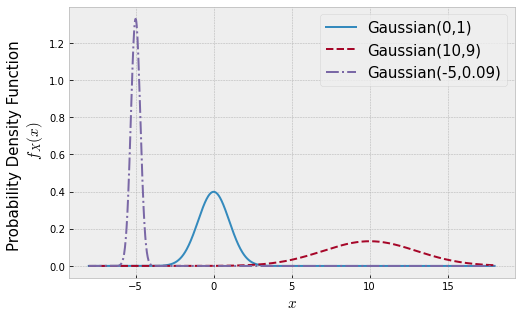

In [3]:
plt.figure(figsize=(8,5))

x=np.linspace(-8,18,1000)
plt.plot(x,G1.pdf(x),label='Gaussian(0,1)')
plt.plot(x,G2.pdf(x),'--',label='Gaussian(10,9)')
plt.plot(x,G3.pdf(x),'-.',label='Gaussian(-5,0.09)')
plt.legend(fontsize=15)
plt.xlabel('$x$',size=15)
plt.ylabel('Probability Density Function \n $f_X(x)$',size=15);

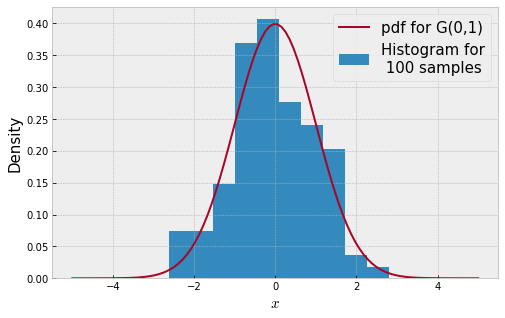

In [4]:
samples=G1.rvs(size=100)

plt.figure(figsize=(8,5))
x=np.linspace(-5,5,100)
plt.hist(samples,density=True, label='Histogram for\n 100 samples')
plt.plot(x, G1.pdf(x), label='pdf for G(0,1)')
plt.legend(fontsize=15)
plt.xlabel('$x$',size=15)
plt.ylabel('Density',size=15);

## Multivariate Gaussian

In the **multivariate** case, the pdf of a Gaussian distribution for a random variable $X\in\mathbb{R}^D$ can be written as

$$f_X(x) = \frac{1}{(2\pi)^{1/2}\left|\Sigma\right|^{d/2}}\exp\left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{\mu}\right)^T\Sigma^{-1}\left(\mathbf{x}-\mathbf{\mu}\right)\right)$$

In this case, we say that $X$ follows a Gaussian distribution with mean $\mu$ and covariance $\Sigma$, or, $X\sim N(\mu,\Sigma)$.

* $\mu$ is a $D$-dimensional mean vector
* $\Sigma$ is a $D\times D$ covariance matrix
* $\left|\Sigma\right|$ denotes the determinant of $\Sigma$
* The precision parameter in a $D$-dimensional space is equal to $\beta = \Sigma^{-1}$

Let $X=[X_1,X_2]$. The **covariance** $\Sigma$ measures the amount of variance is each individual dimension, $X_1$ and $X_2$, as well as the amount of covariance between the two. We can write the covariance as

\begin{align}
\text{cov}(X_1,X_2) &= E\bigl[\left(X_1-E\left[X_1\right]\right) \left(X_2-E\left[X_2\right]\right)\bigr]\\
&= \left[\begin{array}{cc}\text{var}(X_1) & \text{cov}(X_1,X_2) \\ \text{cov}(X_1,X_2) & \text{var}(X_2)\end{array}\right]\\
&= \left[\begin{array}{cc}\sigma^2_{X_1} & \text{cov}(X_1,X_2) \\ \text{cov}(X_1,X_2) & \sigma^2_{X_2}\end{array}\right]
\end{align}

* The **Pearson's correlation coefficient** between random variables $X_1$ and $X_2$ is defined as:

$$ r = \frac{\operatorname{cov}(X_1,X_2)}{\sqrt{\text{var}(X_1)}\sqrt{\text{var}(X_2)}} = \frac{\text{cov}(X_1,X_2)}{\sigma_{X_1} \sigma_{X_2}}$$

In [12]:
mu = np.array([0,0])
covariance  = np.array([[1,0.5],[0.5,1]])

G = stats.multivariate_normal(mu, covariance)

<IPython.core.display.Javascript object>


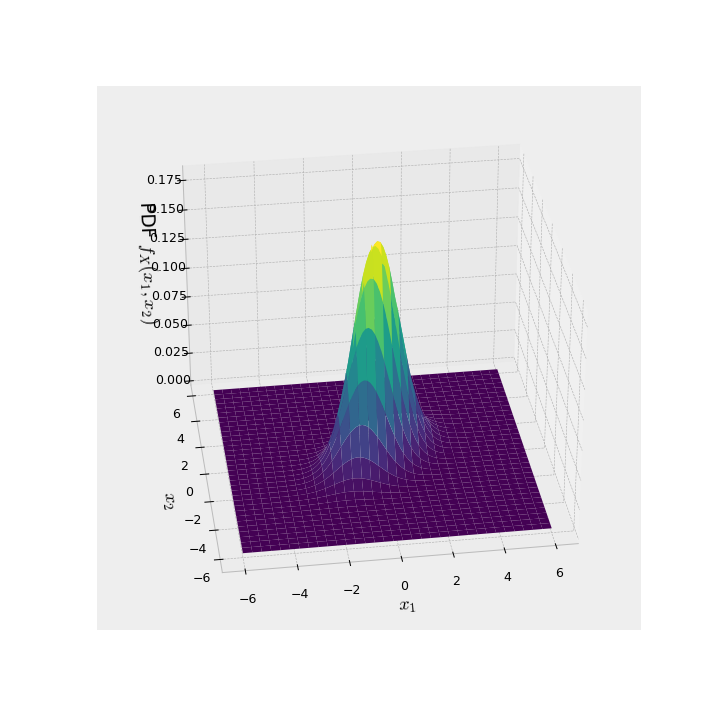

In [13]:
x, y = np.mgrid[-6:6:100j, -6:6:100j]
xy = np.column_stack([x.flat, y.flat])
z = stats.multivariate_normal.pdf(xy, mean=mu, cov=covariance)
z = z.reshape(x.shape)

%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=plt.cm.viridis)
ax.set_xlabel('$x_1$',size=15)
ax.set_ylabel('$x_2$',size=15)
ax.set_zlabel('PDF $f_X(x_1,x_2)$',size=15);

Let's use the Mathematica's demonstration ["Joint Density of Bivariate Gaussian Random Variables"](https://demonstrations.wolfram.com/JointDensityOfBivariateGaussianRandomVariables/) to better understand the role of the covariance matrix.

___

# Prior Online Update

## Example: Gaussian-Gaussian Conjugate Prior Relationship

For a D-dimensional Gaussian data likelihood with mean $\mu$ and covariance $\beta\mathbf{I}$ and a prior distribution with mean $\mu_0$ and covariance $\Sigma_0$

\begin{align}
P(\mathbf{t}|\mathbf{w}) &\sim \mathcal{N}(\mathbf{\mu}, \beta\mathbf{I}) \\
P(\mathbf{w}) &\sim \mathcal{N}(\mathbf{\mu}_0,\Sigma_0)
\end{align}

The posterior distribution

\begin{align}
P(\mathbf{w}|\mathbf{t}) &\sim \mathcal{N}\left(\mathbf{\mu}_N, \Sigma_N\right) \\
\mathbf{\mu}_N &= \Sigma_N \left(\Sigma_0^{-1}\mathbf{\mu}_0+\beta\mathbf{\mathbf{X}}^T\mathbf{t}\right)\\
\Sigma_N^{-1} &= \Sigma_0^{-1} + \beta \mathbf{\mathbf{X}}^T\mathbf{\mathbf{X}}
\end{align}

where $\mathbf{X}$ is the feature matrix of size $N \times M$.

* What happens with different values of $\beta$ and $\Sigma_0$?

To simplify, let's assume the covariance of prior is **isotropic**, that is, it is a diagonal matrix with the same value along the diagonal, $\Sigma_0 = \alpha^{-1}\mathbf{I}$. And, let also $\mathbf{\mu}_0 = [0,0]$, thus 

$$\mu_N = \beta \Sigma_N\mathbf{X}^T\mathbf{t}$$

and

$$\Sigma_N = \left(\alpha^{-1}\mathbf{I} + \beta \mathbf{X}^T\mathbf{X}\right)^{-1} $$

### Example of Online Updating of the Prior using Conjugate Priors (Gaussian-Gaussian)

Let's consider the example presented in the Bishop textbook (Figure 3.7 in page 155).

Consider a single input variable $\mathbf{x}$, a single target variable $\mathbf{t}$ and a linear model of the form $y(\mathbf{x},\mathbf{w}) = w_0 + w_1\mathbf{x}$.
Because this has just two parameters coefficients, $w=[w_0, w_1]^T$, we can plot the prior and posterior distributions directly in parameter space (2-dimensional parameter space).

Let's generate some synthetic data from the function $f(x, a) = w_0 + w_1x$ with parameter values $w_0 = −0.3$ and $w_1 = 0.5$ by first choosing values of $x_n$ from the uniform distribution $U(x_n|−1, 1)$, then evaluating $f(x_n, \mathbf{w})$, and finally adding Gaussian noise with standard deviation of $\sigma = 0.2$ to obtain the target values $t_n$.

$$t_n = f(x_n, \mathbf{w}) + \epsilon = -0.3 + 0.5 x_n + \mathbf{\epsilon}$$

where $\mathbf{\epsilon}\sim \mathcal{N}(0,\beta\mathbf{I})$.

* **Our goal is to recover the values of $w_0$ and $w_1$ from such data, and we will explore the dependence on the size of the data set.**

For some data, $\{x_n,t_n\}_{n=1}^N$, we can pose this problem in terms of **Regularized Least Squares**:

\begin{align}
J(\mathbf{w}) &= \frac{1}{2} \sum_{n=1}^N \left(t_n - y_n\right)^2 + \frac{\lambda}{2} \sum_{i=0}^1 w_i^2 \\
&= \frac{1}{N} \sum_{n=1}^2 \left(t_n - y_n\right)^2 + \frac{\lambda}{2} \left(w_0^2 + w_1^2\right)\\
& \Rightarrow \arg_{\mathbf{w}}\min J(\mathbf{w})
\end{align}

* Using **MAP**, we can rewrite our objective using the **Bayesian interpretation**:

\begin{align}
\arg_{\mathbf{w}} \max P(\mathbf{\epsilon}|\mathbf{w})P(\mathbf{w})
\end{align}

Let's consider the data likelihood, $P(\mathbf{\epsilon}|\mathbf{w})$, to be a Gaussian distribution with mean $\mu = 0$ and variance $\sigma^2 = \beta\mathbf{I}$. And let's also consider the prior distribution, $P(\mathbf{w})$, to be a Gaussian distribution with mean $\mu_0$ and variance $\sigma_0^2 = \alpha^{-1}\mathbf{I}$. Then, using the derivations from above, we can rewrite our optimization as:

\begin{align}
\arg_{\mathbf{w}} \max & \mathcal{N}(\mathbf{\epsilon}|0,\beta\mathbf{I})\mathcal{N}(\mathbf{w}|\mathbf{\mu_0} ,\alpha^{-1}\mathbf{I}) \\
\propto\arg_{\mathbf{w}} \max & \mathcal{N}\left( \beta \Sigma_N^{-1} \mathbf{X}^T\mathbf{t}, \Sigma_N \right)
\end{align}

where $\mathbf{\mu}_0 = [0,0]$, $\mathbf{X}$ is the polynomial feature matrix, and $\Sigma_N = \left(\alpha^{-1}\mathbf{I} + \beta \mathbf{X}^T \mathbf{X}\right)^{-1}$ is the covariance matrix of the posterior distribution.

Note that we **do not known** the parameters of the prior distribution ($\mu_0$ and $\sigma_0$ are unknown). The parameters of the prior distribution will have to be chosen by the user. And they will essentially *encode* any behavior or a priori knowledge we may have about the weights.

* **Both our data likelihood and prior distributions are in a 2-dimensional space (this is because our *model order* is $M=2$ -- we have 2 parameters!).**

We are going to generate data from $t = -0.3 + 0.5x + \epsilon$ where $\epsilon$ is drawn from a zero-mean Gaussin distribution.

* **The goal is to estimate the values $w_0=-0.3$ and $w_1=0.5$**
* The feature matrix $\mathbf{X}$ can be computed using the polynomial basis functions
* **Parameters to choose:** $\beta$ and $\alpha$

We want to implement this scenario for a case that we are getting more data every minute. As we get more and more data, we want to **update our prior distribution using our posterior distribution (informative prior)**, because they take the have the same distribution form. This is only possible because because Gaussian-Gaussian have a conjugate prior relationship. That is, the posterior distribution is also a Gaussian.

In [ ]:
import math
from scipy.stats import multivariate_normal
import textwrap

def likelihood_prior_func(beta = 2, alpha = 1, draw_num=(0,1,10,20,50,100)):
    '''Online Update of the Posterior distribution for a Gaussian-Gaussian conjugate prior.
    Parameter:
    beta - variance of the data likelihood (of the additive noise)
    alpha - precision value or 1/variance of the prior distribution
    draw_num - number of points collected at each instance.
    
    This function will update the prior distribution as new data points are received.
    The prior distribution will be the posterior distribution from the last iteration.'''
    
    fig = plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')

    # true (unknown) weights
    a = -0.3 # w0
    b = 0.5  # w1
    
    # set up input space
    rangeX = [-2, 2] # range of values for the input
    step = 0.025 # distance between points
    X = np.mgrid[rangeX[0]:rangeX[1]:step] # creates a grid of values for input samples

    #initialize prior/posterior and sample data
    S0 = (1/alpha)*np.eye(2) # prior covariance matrix
    sigma = S0 # copying it so we can update it later
    mean = [0,0] # mean for prior
    
    # Draws samples from Uniform(-1,1) distribution
    draws = np.random.uniform(rangeX[0],rangeX[1],size=draw_num[-1])
    # Generate the noisy target samples
    T = a + b*draws + np.random.normal(loc=0, scale=math.sqrt(beta))

    for i in range(len(draw_num)):
        if draw_num[i]>0: #skip first image
            
            # INPUT DATA
            #Feature Matrix (Polynomial features with M=2)
            FeatureMatrix = np.array([draws[:draw_num[i]]**m for m in range(2)]).T
            #Target Values
            t = T[0:draw_num[i]]
            
            # POSTERIOR PROBABILITY
            # Covariance matrix
            sigma = np.linalg.inv(S0 + beta*FeatureMatrix.T@FeatureMatrix)
            # Mean vector
            mean = beta*sigma@FeatureMatrix.T@t
            
            # PARAMETER SPACE
            # create a meshgrid of possible values for w's
            w0, w1 = np.mgrid[rangeX[0]:rangeX[1]:step, rangeX[0]:rangeX[1]:step]
            
            # Define the Gaussian distribution for data likelihood
            p = multivariate_normal(mean=t[draw_num[i]-1], cov=beta)
            # Initialize the PDF for data likelihood
            out = np.empty(w0.shape)
            # For each value (w0,w1), compute the PDF for all data samples
            for j in range(len(w0)):
                out[j] = p.pdf(w0[j]+w1[j]*draws[draw_num[i]-1])
            
            # Plot the data likelihood
            ax = fig.add_subplot(*[len(draw_num),3,(i)*3+1])
            ax.pcolor(w0, w1, out)
            # Add the current value for parameters w=(w0,w1)
            ax.scatter(a,b, c='c')
            myTitle = 'data likelihood'
            ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

        # PARAMETER SPACE
        # create a meshgrid of possible values for w's
        w0, w1 = np.mgrid[rangeX[0]:rangeX[1]:step, rangeX[0]:rangeX[1]:step]
        
        # POSTERIOR PROBABILITY
        # initialize the matrix with posterior PDF values
        pos = np.empty(w1.shape + (2,))
        # for w0
        pos[:, :, 0] = w0
        # and for w1
        pos[:, :, 1] = w1
        # compute the PDF
        p = multivariate_normal(mean=mean, cov=sigma)

        #Show prior/posterior
        ax = fig.add_subplot(*[len(draw_num),3,(i)*3+2])
        ax.pcolor(w0, w1, p.pdf(pos))
        # Add the value for parameters w=(w0,w1) that MAXIMIZE THE POSTERIOR
        ax.scatter(a,b, c='c')
        myTitle = 'Prior/Posterior'
        ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

        # DATA SPACE
        ax = fig.add_subplot(*[len(draw_num),3,(i)*3+3])
        for j in range(6):
            # draw sample from the prior probability to generate possible values for parameters 
            w0, w1 = np.random.multivariate_normal(mean=mean, cov=sigma)
            # Estimated labels
            t = w0 + w1*X
            # Show data space
            ax.plot(X,t)
            if draw_num[i] > 0:
                ax.scatter(FeatureMatrix[:,1], T[0:draw_num[i]])
            myTitle = 'data space'
            ax.set_title("\n".join(textwrap.wrap(myTitle, 100)))

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Parameters
# beta - variance of the data likelihood (for the additive noise)
# alpha - precision value or 1/variance for the prior distribution
# draw_num - number of points collected at each instance

likelihood_prior_func(beta = 0.5, alpha = 1/2, draw_num=(0,1,2,20,100))

to be continued...